<a href="https://colab.research.google.com/github/rst-analytics/atelier-ml/blob/master/explore_DPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![SIP](https://www.modernisation.gouv.fr/sites/default/files/styles/diaporama-visuel_w700_h310/public/institutionnel/une_presentation_sip_2018.png?itok=M5xPXKrQ)


# Journée au coeur des données du 19 novembre 2018

### Jouons avec les DPE (fchiers mis en open data par l'Ademe)

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/DPE_-_EPDB_francais.png/220px-DPE_-_EPDB_francais.png) avec  ![Pyhton](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/110px-Python-logo-notext.svg.png) et ![Tscikit](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png) 




Les fichiers sont disponibles sur le site de l'Ademe : https://www.ademe.fr/observatoire-diagnostics-performance-energetique-dpe


## Disclaimers



*   L’article 1 er de la loi du 12 juillet 2010 portant engagement national pour l’environnement a introduit l’obligation de transmettre les DPE, réalisés à l’occasion de la vente ou de la location d’un bâtiment ou d’un  logement, à l’ADEME.
**Les données collectées  par l’ADEME dans la base DPE sont transmises sous la seule responsabilité des diagnostiqueurs. **
* ** L’ADEME n’exerce aucun contrôle sur les valeurs ou informations contenues dans la base.**

* Ce _notebook_ est illustratif. Il ne prétend pas avoir une rigueur scientifique, ni un approche statistique professionnelle. Il ne prétend pas avoir une rigueur sur la question des DPE, des règles de la construction ou des méthodologies de diagnotic énergétique. De nombreuses interprétations seront donc  sans doute jugées maladroites par les spécialistes (voir disclaimers 2). Le _notebook_ sert uniquement de support à un atelier _pédagogique_ sur l'exploration de données et sur la découverte du _machine learning_. La base DPE est plus un motif d'exploration (c'est une donnée qui parle à tous) qu'un objectif d'exploration.


## Disclaimers 2 ou _de l'intérêt d'hybrider données et expertise métier_ ou _du danger du traitement de données sans discernement_


Ce _notebook_ illustre aussi (vonlontairement) **ce qu'il ne faut pas faire** : travail de _machine learning_ sans expertise métier et sans objectif clair.


*   En travaillant uniquement sur les données DPE, les traitements de _machine learning_ se limitent à des données "un peu simplifiées" de thermique du bâtiment. 
*   Sans objectif clair de politique publique, un traitement "très brut" de prédiction s'appuyera sur la date de construction, comme "prédicteur" de la classe DPE, indépendamment des traux d'isolation qui ont pu avoir lieu. Les logements ayant fait l'objet de travaux peuvent donc être considérés comme du _bruit_ ou comme des _erreurs_ car s'écartant clairement de la moyenne ... alors même que nous cherchons à promouvoir ces initiatives. Prédire les DPE à partir de quelques éléments peut donc sembler maladroit (mais ça va dépendre de l'objectif).

Le mieux est donc de mixer les approches **data** avec des approches **métier** pour éviter des interprétations proches de la caricature.




## Supervision générale des données (SGD)

* Ce notebook (et cet atelier) a aussi pour vocation de mettre en avant la base DPE de l'ADEME et d'**initier** le chantier de mise en qualité de cette base, inscrite dans la [feuille de route SGD 2018-2019](http://www.ecologique-solidaire.gouv.fr/sites/default/files/SGD%20-%20Feuille%20de%20route.pdf).

* Plus d'information sur le SGD : https://www.ecologique-solidaire.gouv.fr/missions-du-superviseur-general-des-donnees

![SGD](https://raw.githubusercontent.com/rst-analytics/atelier-ml/master/Capture%20d%E2%80%99%C3%A9cran_2018-11-11_14-03-03.png)





## _Machine learning_


<img src="https://raw.githubusercontent.com/rst-analytics/atelier-ml/master/Capture%20d%E2%80%99%C3%A9cran_2018-11-11_14-16-34.png" width="400" height="200" />


_(picto Noun Projet, Noun Pro acccount)_




*   « ML is the field of study that gives computers the ability to learn without being explicity programmed » (Arthur Samuel, 1959)
*   « Machine learning is the science (and art) of programming computers so **they can learn from data** » (Aurélien Guéron)


#### Au-delà du buzzword, le machine learning, c’est quoi ?

* Apprendre à partir de données puis généraliser !
* Apprendre sans programmation explicite !
* Pour estimer des fonctions trop complexes à écrire de manière explicite.

<img src="https://raw.githubusercontent.com/rst-analytics/atelier-ml/master/Capture%20d%E2%80%99%C3%A9cran_2018-11-11_14-21-49.png" width="600" height="400" />

## Intuitions de départ (à confirmer par la suite)

* Il existe une corrélation forte entre la classe DPE et l'année de construction du logement.
* En analysant les données DPE collectées par des diagnostiqueurs professionnels selon une méthodologie précise et rigoureuse, il doit être possible (sous réserve de disposer de suffisamment d'information dans les données) de prédire avec une bonne précision la classe d'un logement à partir d'informations très simples et facilement mesurables (c'est à dire sans disposer de compétences particulières sur les logements). Relire le paragraphe "Disclairmers 2"
* Certains DPE sont sans doute peu rigoureux dans leur constitution (expérience personnelle de l'auteur du _notebook_) mais la grande majorité répond à la rigueur du processus réglementaire.

### Chargement des  lib _Python_ indispensables :


In [0]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

!pip install graphviz 
! apt-get install graphviz
import graphviz 


## Regardons un peu les données "DPE logement" (découverte, exploration, visualisation ...)

### Petite astuce (les fichiers sont pré-chargés sur un drive Google pour éviter le temps de téléversement : il y a 500 Mo de DPE !!!)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

### Chargeons les données 

In [3]:
dpe_df_ini = pd.read_csv("/content/gdrive/My Drive/ml-dpe/DPE_logements.csv",sep=';', encoding='utf_8')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
dpe_df = dpe_df_ini.copy()

nb_dpe_ini = len(dpe_df)

### Description rapide des données (`info()`)

In [5]:
dpe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279007 entries, 0 to 3279006
Data columns (total 21 columns):
numero_dpe                        object
tr001_modele_dpe_id               int64
consommation_energie              float64
classe_consommation_energie       object
estimation_ges                    float64
classe_estimation_ges             object
tr002_type_batiment_id            int64
annee_construction                int64
surface_habitable                 float64
tv016_departement_id              int64
commune                           object
code_insee_commune_corrige        object
shon                              float64
date_reception_dpe                object
besoin_chauffage                  float64
deperdition_enveloppe             float64
deperdition_renouvellement_air    float64
tv026_classe_inertie_id           float64
altitude                          int64
nombre_niveau                     float64
hsp_moyenne                       float64
dtypes: float64(10), 

Il y a environ **3.3 millions de  DPE** dans le fichiers, avec 21 colonnes.

L'Ademe nous donne un descriptif des données


<img src="https://raw.githubusercontent.com/rst-analytics/atelier-ml/master/Capture%20d%E2%80%99%C3%A9cran_2018-11-10_21-01-21.png" width="500" height="500" />

Notons que le type d'énergie (électricité, bois, fuel, gaz, photovoltaïque) n'est pas fourni. C'est dommage car cette information est sans doute primordiale pour la détermination de la classe DPE.

## Certaines colonnes sont des _factor_ : ce ne sont pas des données numériques mais des références à des catégories

Exemples : 

* Dans la colonne tr004_type_energie_id, la valeur 2 correspond à l'énergie **Electricité** et non à l'entier 2
* Dans la colonne tv016_departement_id, la valeur 67 est le **Bas-Rhin** et non à l'entier 67

Il n'y a pas de relation d'ordre entre les catégories ;  Ni de distance !

Il faudra gérer ces éléments pour éviter de traiter ces colonnes comme des données continues, comparables et ordonnées.


In [0]:

dpe_df["tr001_modele_dpe_id"] = dpe_df["tr001_modele_dpe_id"].astype('category')
dpe_df["classe_consommation_energie"] = dpe_df["classe_consommation_energie"].astype('category')
dpe_df["classe_estimation_ges"] = dpe_df["classe_estimation_ges"].astype('category')
dpe_df["tv026_classe_inertie_id"] = dpe_df["tv026_classe_inertie_id"].astype('category')
dpe_df["tr002_type_batiment_id"] = dpe_df["tr002_type_batiment_id"].astype('category')



Pour simplifier l'exploration, supprimons quelque colonnes (histoire de gagner du temps de traitement et de gagner en clareté). C'est un choix fort (mais bon voilà, il faut en faire)

In [0]:
dpe_df = dpe_df.drop(['commune'], axis = 1) 
dpe_df = dpe_df.drop(['code_insee_commune_corrige'], axis = 1) 
dpe_df = dpe_df.drop(['numero_dpe'], axis = 1) 
dpe_df = dpe_df.drop(['shon'], axis = 1)
dpe_df = dpe_df.drop(['date_reception_dpe'], axis = 1)


### Description des données (min, max, moyenne de chaque colonne)


In [8]:
dpe_df.describe()

,consommation_energie,estimation_ges,annee_construction,surface_habitable,tv016_departement_id,besoin_chauffage,deperdition_enveloppe,deperdition_renouvellement_air,altitude,nombre_niveau,hsp_moyenne
count,3.279007e+06,3.279007e+06,3.279007e+06,3.278974e+06,3.279007e+06,3.279007e+06,3.279007e+06,3.279007e+06,3.279007e+06,3.278958e+06,3.279007e+06
mean,2.779150e+02,6.278048e+01,1.912262e+03,8.789657e+01,5.182157e+01,2.171903e+02,3.044520e+02,4.357642e+01,1.354279e+02,1.150501e+00,2.048393e+00
std,5.769748e+04,5.536197e+04,3.907173e+02,1.949100e+02,2.654828e+01,1.586487e+03,2.265993e+03,7.993988e+01,5.848539e+02,1.413446e+01,9.931067e-01
min,-1.314000e+03,-1.790000e+02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-2.811500e+02,0.000000e+00,-8.300000e+01,0.000000e+00,0.000000e+00
25%,1.600000e+02,1.000000e+01,1.948000e+03,5.600000e+01,3.100000e+01,3.187000e+01,5.598000e+01,1.826000e+01,1.000000e+01,1.000000e+00,2.440000e+00
50%,2.180000e+02,2.112000e+01,1.975000e+03,8.000000e+01,5.600000e+01,1.008400e+02,1.523400e+02,4.026000e+01,7.900000e+01,1.000000e+00,2.500000e+00
75%,2.910000e+02,4.300000e+01,1.994000e+03,1.080000e+02,7.500000e+01,1.951300e+02,2.695600e+02,6.201000e+01,1.800000e+02,1.000000e+00,2.500000e+00
max,1.000000e+08,1.000000e+08,3.276700e+04,3.046500e+05,9.700000e+01,1.897641e+05,3.230284e+05,1.150564e+05,9.020040e+05,1.966100e+04,6.990000e+00


La colonne annee_construction suggère qu'il va falloir nettoyer un peu les données : certaines dates sont supérieures à 2018 (voire franchement futuristes comme l'an 32 767) et d'autres très médiévales, voire très très anciennes ! Il y a des conso négatives également ;-). Il y a aussi des très grosses surfaces qu'il faudra éliminer ou gérer. De nombreuses surfaces ne sont pas renseignées. Des consommations sont négatives ... d'autres sont très (trop ?) importantes


### Regardons un peu les classes DPE (conso)

In [9]:
dpe_df["classe_consommation_energie"].value_counts()

D    1179605
E     909626
C     555347
F     357156
G     123916
B     112622
A      40724
N         11
Name: classe_consommation_energie, dtype: int64

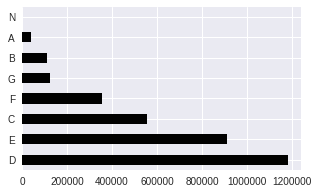

In [10]:
dpe_df.classe_consommation_energie.value_counts().plot.barh(color='k',figsize=[5,3])
sns.despine()

Peu de A (normal), beaucoup de D.

#### Regardons un les consommations (en ) pour chaque classe avec des boîtes à moustaches

![boite à moustache](http://4.bp.blogspot.com/-8D73Wz4iWRQ/ThL5tF0thAI/AAAAAAAAP18/ykE4aRBtSew/s1600/Boite+moustache+commentaires.png)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


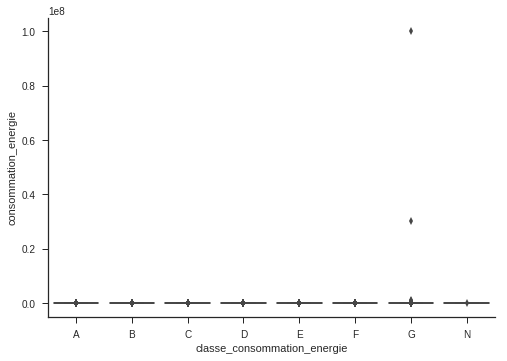

In [11]:
sns.set(style="ticks", color_codes=True)
sns.boxplot(x="classe_consommation_energie", y="consommation_energie", 
            data=dpe_df)
sns.despine()                              

Ca ne ressemble à rien car des valeurs extrêmes écrasent le graphique. _Same Player - Shoot Again_ avec quelques ajustements (on ne garde que les consommations  < 900, ce qui semple assez réaliste)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


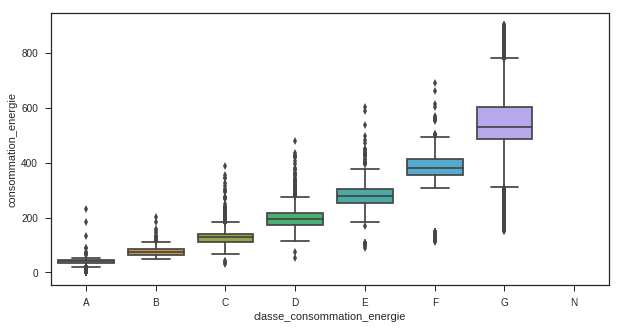

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="classe_consommation_energie", y="consommation_energie", 
            data=dpe_df[(dpe_df.consommation_energie < 900) & (dpe_df.consommation_energie > 0)])

On constate quelques anomalies et notamment des recouvrements _étranges_ entre les classes alors qu'elles devraient être disjointes. Pour mémoire, voici le célèbre schéma DPE : 

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/DPE_-_EPDB_francais.png/220px-DPE_-_EPDB_francais.png) 

Pour s'en convraincre, dessinons les limites !

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


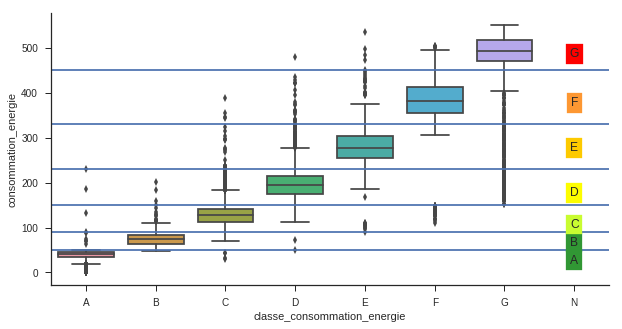

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="classe_consommation_energie", y="consommation_energie", 
            data=dpe_df[(dpe_df.consommation_energie <550) & (dpe_df.consommation_energie > 0)])

#50 90 150 230 330 450
ax.axhline(50,0,10)
ax.axhline(90,0,10)
ax.axhline(150,0,10)
ax.axhline(230,0,10)
ax.axhline(330,0,10)
ax.axhline(450,0,10)
y_ = 1300
ax.text(7,40,'A',ha='center',va='top',backgroundcolor='#319734')

ax.text(7,80,'B',ha='center',va='top',backgroundcolor='#319734')
ax.text(7,120,'C',ha='center',va='top',backgroundcolor='#C9FC31')
ax.text(7,190,'D',ha='center',va='top',backgroundcolor='#FDFD00')
ax.text(7,290,'E',ha='center',va='top',backgroundcolor='#FDCA00')
ax.text(7,390,'F',ha='center',va='top',backgroundcolor='#FD9732')
ax.text(7,500,'G',ha='center',va='top',backgroundcolor='#FD0100')
sns.despine()

Exemple : Nombre de DPE classe E hors limite ?  

In [14]:
len(dpe_df[((dpe_df.classe_consommation_energie== "E") &
                            ((dpe_df.consommation_energie > 330) |
                            (dpe_df.consommation_energie < 230 )))])

4270

### Regardons un peu les années de construction 

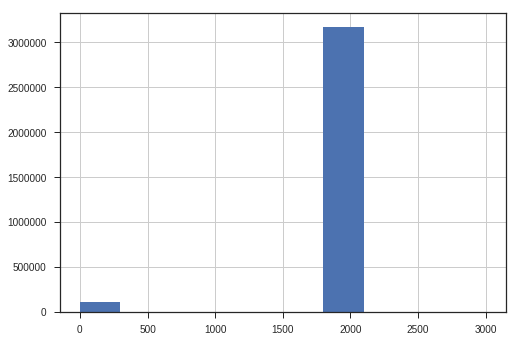

In [15]:
dpe_df["annee_construction"].hist(range = [0,3000])


#### Zoom sur les années 1900 - 2018 

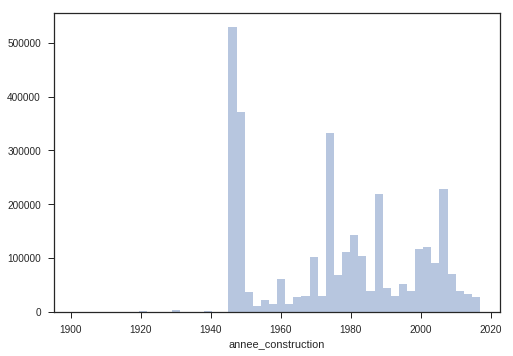

In [16]:

dpe_an = dpe_df["annee_construction"]
dpe_an = dpe_an[(dpe_an <2018)& (dpe_an >1900) ]
sns.distplot(dpe_an,kde=False)

In [17]:
print(dpe_df["annee_construction"].max())
print(dpe_df["annee_construction"].min())

32767
0


De <img src="http://toutartfaire.com/wp-content/uploads/2015/12/acropole-1038x576.jpg" width="200" height="150" /> à  <img src="http://www.cgarchitect.com/content/portfolioitems/2017/05/137654/MIAMI_2050_medium.jpg" width="150" height="150" />

Il faudra filtrer sur les dates également ; certaines sont 0, ou dans un futur (très) lointain.


### *Quid* des classes en fonction des dates de construction ?



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


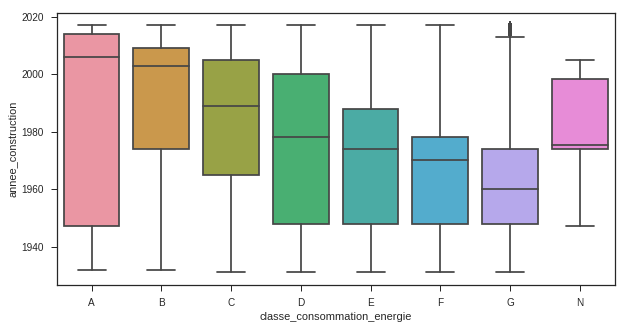

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="classe_consommation_energie", y="annee_construction", 
            data=dpe_df[(dpe_df.annee_construction > 1930) & (dpe_df.annee_construction < 2018)])

Très très étonnant ! Pour autant, la médiane suggère une très nette corrélation entre la classe et l'année de construction (ouf !!)

### Quid des surfaces ?

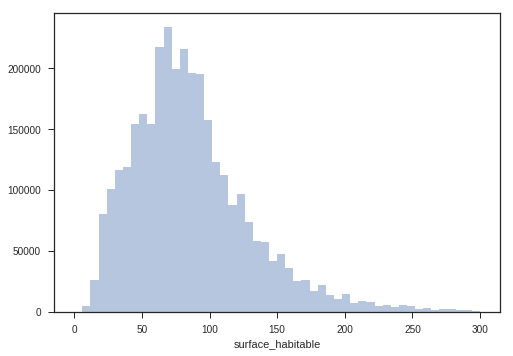

In [19]:
dpe_surf = dpe_df["surface_habitable"]
dpe_surf = dpe_surf[(dpe_surf < 300)]
sns.distplot(dpe_surf,kde=False,)

Trouvons le min et le max des surfaces.

In [20]:
print(min(dpe_df["surface_habitable"]))
print(max(dpe_df["surface_habitable"]))


0.0
304650.0


Pas mal le logement à 300 000 m² (sauf quand il s'agit de passer l'aspirateur dans chaque pièce) !!  Moins sympa, le logement à 0 m².

### Autres explorations

#### Les départements



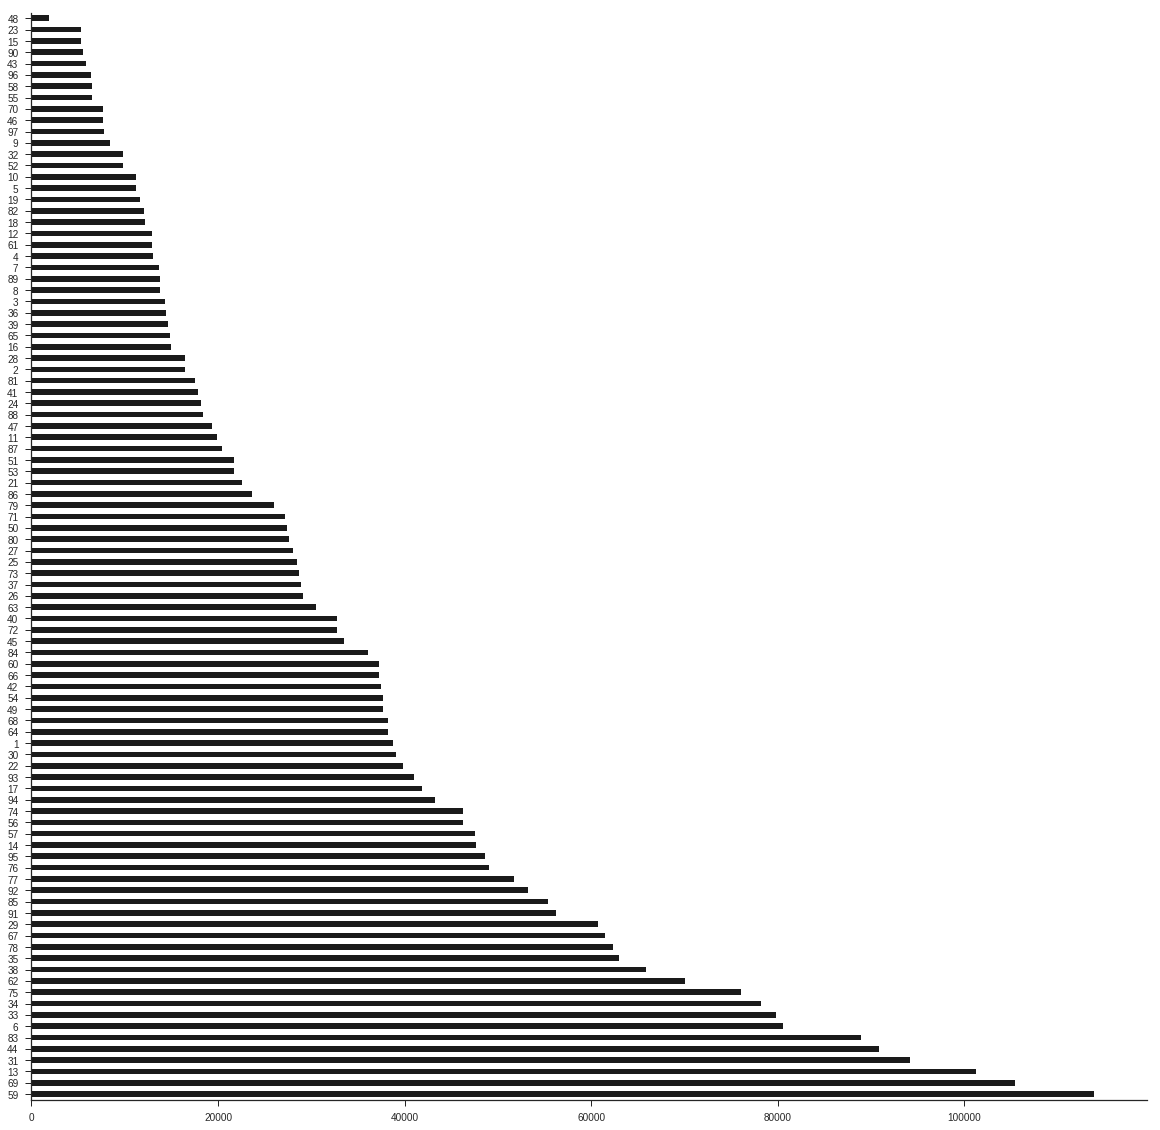

In [21]:
dpe_df.tv016_departement_id.value_counts().plot.barh(color='k',figsize=[20,20])
sns.despine()

La distribution n'est pas homogène. Bien plus de données sur le **Nord** et le ** Rhône** que sur la **Lozère** et la **Creuse**.

####Quid des types de bâtiments ?

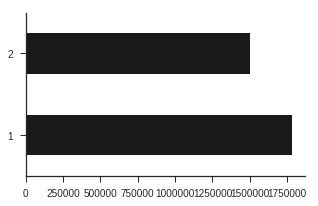

In [22]:
dpe_df.tr002_type_batiment_id.value_counts().plot.barh(color='k',figsize=[5,3])
sns.despine()


Plus de maison (1) que d'appartement (2)

#### Quid des altitudes ?

In [23]:
print(min(dpe_df.altitude))
print(max(dpe_df.altitude))

-83
902004


Il y a des valeurs aberrantes (sous le niveau des mers, altitude de la station ISS ...)

#### Quid du nombre d'étages ?

In [24]:
print(min(dpe_df.nombre_niveau))
print(max(dpe_df.nombre_niveau))



0.0
19661.0


Il y a des valeurs aberrantes (19661 étages !!.)

#### Quid des valeurs manquantes ?


In [25]:
dpe_df.isnull().sum()

tr001_modele_dpe_id                    0
consommation_energie                   0
classe_consommation_energie            0
estimation_ges                         0
classe_estimation_ges                  0
tr002_type_batiment_id                 0
annee_construction                     0
surface_habitable                     33
tv016_departement_id                   0
besoin_chauffage                       0
deperdition_enveloppe                  0
deperdition_renouvellement_air         0
tv026_classe_inertie_id           615331
altitude                               0
nombre_niveau                         49
hsp_moyenne                            0
dtype: int64

## Nettoyons les données

### On ne conserve que les DPE dont la classe et la consommation sont cohérentes ! Comment faire confiance à ces donnéees sinon ?
** Filtrage : On élimine les DPE dont la conso ne correspond pas à la classe affichée !** 





/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


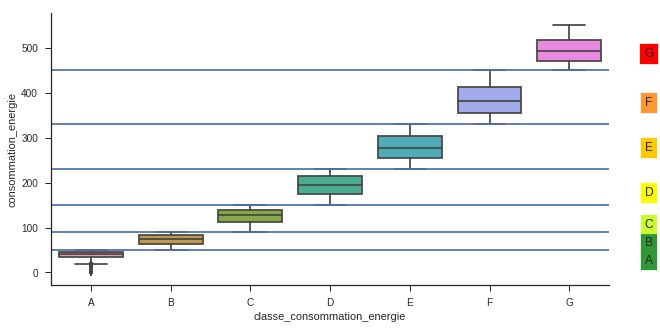

In [33]:
dpe_clean_df = dpe_df.copy()

# DROP les mauvais A
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "A") &
                            (dpe_clean_df.consommation_energie > 50))]

dpe_clean_df = dpe_clean_df.drop(temp_df.index)

# DROP les mauvais B
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "B") &
                            ((dpe_clean_df.consommation_energie > 90) |
                            (dpe_clean_df.consommation_energie < 50 )))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)


# DROP les mauvais C
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "C") &
                            ((dpe_clean_df.consommation_energie > 150) |
                            (dpe_clean_df.consommation_energie < 90 )))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)

# DROP les mauvais D
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "D") &
                            ((dpe_clean_df.consommation_energie > 230) |
                            (dpe_clean_df.consommation_energie < 150 )))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)

# DROP les mauvais E
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "E") &
                            ((dpe_clean_df.consommation_energie > 330) |
                            (dpe_clean_df.consommation_energie < 230 )))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)

# DROP les mauvais F
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "F") &
                            ((dpe_clean_df.consommation_energie > 450) |
                            (dpe_clean_df.consommation_energie < 330 )))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)


# DROP les mauvais G
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "G") &
                            (dpe_clean_df.consommation_energie < 450))]

dpe_clean_df = dpe_clean_df.drop(temp_df.index)






fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="classe_consommation_energie", y="consommation_energie", 
            data=dpe_clean_df[(dpe_clean_df.consommation_energie <550) & (dpe_clean_df.consommation_energie > 0)],
            order=["A", "B" , "C", "D", "E", "F", "G"])

#50 90 150 230 330 450
ax.axhline(50,0,10)
ax.axhline(90,0,10)
ax.axhline(150,0,10)
ax.axhline(230,0,10)
ax.axhline(330,0,10)
ax.axhline(450,0,10)
y_ = 1300
ax.text(7,40,'A',ha='center',va='top',backgroundcolor='#319734')

ax.text(7,80,'B',ha='center',va='top',backgroundcolor='#319734')
ax.text(7,120,'C',ha='center',va='top',backgroundcolor='#C9FC31')
ax.text(7,190,'D',ha='center',va='top',backgroundcolor='#FDFD00')
ax.text(7,290,'E',ha='center',va='top',backgroundcolor='#FDCA00')
ax.text(7,390,'F',ha='center',va='top',backgroundcolor='#FD9732')
ax.text(7,500,'G',ha='center',va='top',backgroundcolor='#FD0100')
sns.despine()

C'est bien mieux :-)

####  Supprimons les dates "étranges" (On en garde que les dates comprises entre 1900 et 2018)

In [0]:
dpe_clean_df = dpe_clean_df[(dpe_clean_df.annee_construction > 1900)]
dpe_clean_df = dpe_clean_df[(dpe_clean_df.annee_construction < 2018)]

#### Supprimons les consommation négatives, trop faibles (<10) et celles trop importantes (> 1000)



In [0]:
dpe_clean_df = dpe_clean_df[(dpe_clean_df.consommation_energie > 10)]

In [36]:
dpe_clean_df = dpe_clean_df[(dpe_clean_df.consommation_energie  < 1000)]

len(dpe_clean_df)

3131487

#### Supprimons les trop grandes surfaces et les trop petites (surf> 300 m² et < 10 m²)

In [37]:
dpe_clean_df = dpe_clean_df[(dpe_clean_df.surface_habitable < 300)]

dpe_clean_df = dpe_clean_df[(dpe_clean_df.surface_habitable  > 10)]

len(dpe_clean_df)

3114095

### Supprimons les lignes abérrantes (plus de 20 étages, altitude > Everest, hsp façon _Hobbits_,  les données non renseignées ou mises à 0 etc.)






In [38]:
dpe_clean_df = dpe_clean_df[(dpe_clean_df.altitude < 2000)]
print(len(dpe_clean_df))

dpe_clean_df = dpe_clean_df[(dpe_clean_df.nombre_niveau  < 20)]
print(len(dpe_clean_df))

dpe_clean_df = dpe_clean_df[(dpe_clean_df.hsp_moyenne  > 1.75)]
print(len(dpe_clean_df))

dpe_clean_df = dpe_clean_df[(dpe_clean_df.besoin_chauffage  > 0)]
print(len(dpe_clean_df))


dpe_clean_df = dpe_clean_df[(dpe_clean_df.deperdition_enveloppe  > 0)]
print(len(dpe_clean_df))

dpe_clean_df = dpe_clean_df[(dpe_clean_df.deperdition_renouvellement_air > 0)]
print(len(dpe_clean_df))





print(len(dpe_clean_df))

3112957
3112740
2612817
2612277
2612268
2612267
2612267


#### Regardons à nouveaux (après filtrage) les classes et les dates de construction

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


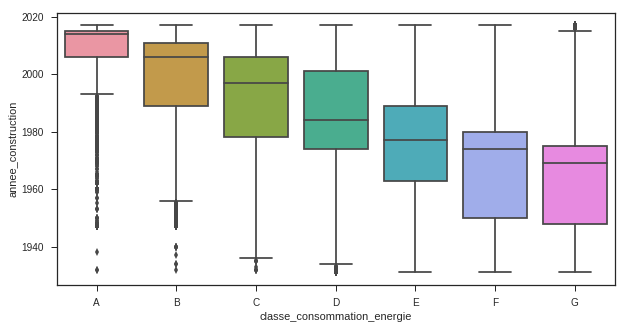

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="classe_consommation_energie", y="annee_construction", 
            data=dpe_clean_df[(dpe_clean_df.annee_construction > 1930) & (dpe_clean_df.annee_construction < 2018)],
            order=["A", "B" , "C", "D", "E", "F", "G"])

C'est bien mieux, mais il reste des valeurs aberrantes à filtrer !! Prenons quelques hypothèses (réalistes ?).

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


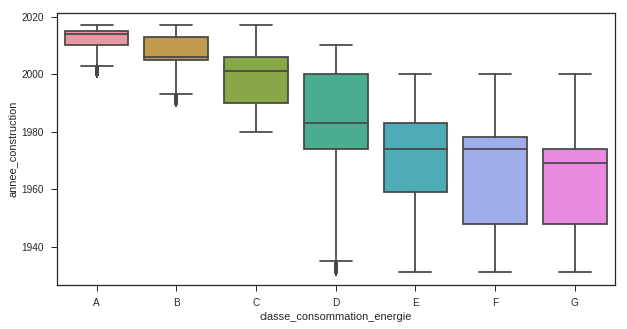

In [40]:
# DROP les mauvais A
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "A") &
                            (dpe_clean_df.annee_construction < 2000))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)


# DROP les mauvais B
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "B") &
                            (dpe_clean_df.annee_construction < 1990))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)


# DROP les mauvais C
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "C") &
                            (dpe_clean_df.annee_construction < 1980))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)


# DROP les mauvais D
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "D") &
                            (dpe_clean_df.annee_construction > 2010))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)

# DROP les mauvais E
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "E") &
                            (dpe_clean_df.annee_construction > 2000))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)

# DROP les mauvais E
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "F") &
                            (dpe_clean_df.annee_construction > 2000))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)

# DROP les mauvais G
temp_df = dpe_clean_df.loc[((dpe_clean_df.classe_consommation_energie== "G") &
                            (dpe_clean_df.annee_construction > 2000))]
dpe_clean_df = dpe_clean_df.drop(temp_df.index)



fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="classe_consommation_energie", y="annee_construction", 
            data=dpe_clean_df[(dpe_clean_df.annee_construction > 1930) & (dpe_clean_df.annee_construction < 2018)],
            order=["A", "B" , "C", "D", "E", "F", "G"])

C'est bien mieux mais bon ... la date ne permet pas (à elle seule) de bien distinguer les classes D, E, F (qui sont les classes les plus nombreuses).

### Regardons les corrélations entre les variables

In [41]:
coor_matrix = dpe_clean_df.corr()
coor_matrix

,consommation_energie,estimation_ges,annee_construction,surface_habitable,tv016_departement_id,besoin_chauffage,deperdition_enveloppe,deperdition_renouvellement_air,altitude,nombre_niveau,hsp_moyenne
consommation_energie,1.000000,0.419052,-0.470062,-0.229940,0.047604,0.017021,0.005990,-0.098588,0.201176,-0.043896,0.037539
estimation_ges,0.419052,1.000000,-0.474691,0.037970,0.056914,0.075546,0.062942,0.155331,0.097064,0.052209,0.064221
annee_construction,-0.470062,-0.474691,1.000000,0.055731,-0.013083,-0.055808,-0.047401,-0.081807,-0.033845,-0.054085,-0.099619
surface_habitable,-0.229940,0.037970,0.055731,1.000000,-0.001319,0.004852,0.002945,0.877373,0.027068,0.115733,0.078170
tv016_departement_id,0.047604,0.056914,-0.013083,-0.001319,1.000000,0.043744,0.042939,0.000950,-0.058572,0.045078,-0.016297
besoin_chauffage,0.017021,0.075546,-0.055808,0.004852,0.043744,1.000000,0.997969,0.023510,-0.012200,0.547012,-0.001510
deperdition_enveloppe,0.005990,0.062942,-0.047401,0.002945,0.042939,0.997969,1.000000,0.019259,-0.014112,0.546745,-0.002499
deperdition_renouvellement_air,-0.098588,0.155331,-0.081807,0.877373,0.000950,0.023510,0.019259,1.000000,0.011602,0.104223,0.081866
altitude,0.201176,0.097064,-0.033845,0.027068,-0.058572,-0.012200,-0.014112,0.011602,1.000000,0.012202,-0.036218
nombre_niveau,-0.043896,0.052209,-0.054085,0.115733,0.045078,0.547012,0.546745,0.104223,0.012202,1.000000,-0.010539


Quelques corrélations évidentes, d'autres plus étonnantes.

Regardons plus précisément les corrélations avec la consommation.


---



In [42]:
coor_matrix["consommation_energie"].sort_values(ascending = False)

consommation_energie              1.000000
estimation_ges                    0.419052
altitude                          0.201176
tv016_departement_id              0.047604
hsp_moyenne                       0.037539
besoin_chauffage                  0.017021
deperdition_enveloppe             0.005990
nombre_niveau                    -0.043896
deperdition_renouvellement_air   -0.098588
surface_habitable                -0.229940
annee_construction               -0.470062
Name: consommation_energie, dtype: float64

### Valeurs manquantes ? (a priori non, filtrage en amont)

In [0]:
dpe_clean_df.isnull().sum()

In [43]:
dpe_clean_df.dropna()
dpe_clean_df.dropna(subset=['nombre_niveau'], inplace=True)
dpe_clean_df.dropna(subset=['tv026_classe_inertie_id'], inplace=True)
dpe_clean_df.isnull().sum()

tr001_modele_dpe_id               0
consommation_energie              0
classe_consommation_energie       0
estimation_ges                    0
classe_estimation_ges             0
tr002_type_batiment_id            0
annee_construction                0
surface_habitable                 0
tv016_departement_id              0
besoin_chauffage                  0
deperdition_enveloppe             0
deperdition_renouvellement_air    0
tv026_classe_inertie_id           0
altitude                          0
nombre_niveau                     0
hsp_moyenne                       0
dtype: int64

### Données filtrées

In [44]:
print(nb_dpe_ini)

nb_dpe_clean = len(dpe_clean_df)
print(nb_dpe_clean)

diff =  nb_dpe_ini - nb_dpe_clean
rate = round(diff/nb_dpe_ini*100,0)

print(diff)
print(rate)



3279007
2339928
939079
29.0


# Passons au Machine learning (on est là pour ça !)

### Principes

 <img src="https://raw.githubusercontent.com/rst-analytics/atelier-ml/master/Capture%20d%E2%80%99%C3%A9cran_2018-11-11_14-25-37.png" width="500" height="300" />



### Séparons le jeu de données en un ensemble d'apprentissage (train) et en un ensemble de test (test)


 <img src="https://raw.githubusercontent.com/rst-analytics/atelier-ml/master/Capture%20d%E2%80%99%C3%A9cran_2018-11-11_14-28-07.png" width="500" height="300" />




### On supprime quelques colonnes du *data set *(sinon c'est de la triche) et on sélectionne 500 000 DPE (sinon ça prend trop de temps de calcul)!


In [0]:
dpe_clean_df2 = dpe_clean_df[(dpe_clean_df.tr002_type_batiment_id == 2)]

dpe_ml_df = dpe_clean_df2.sample(n=500000)

dpe_ml_df.reset_index(inplace=True)

dpe_ml_df = dpe_ml_df.drop(["estimation_ges","classe_estimation_ges","consommation_energie"],axis=1)
dpe_ml_df = dpe_ml_df.drop(["besoin_chauffage","deperdition_renouvellement_air","deperdition_enveloppe","index"],axis=1)



### On sépare les données d'apprentissages des _labels_ (les classes)

In [0]:
target = dpe_ml_df["classe_consommation_energie"]
data = dpe_ml_df.copy()
data = data.drop(["classe_consommation_energie"],axis=1)

### Pyhton gère moins bien les catégories que R : on transforme les colonnes avec l'astuce du  _One hot encoding_ !

Exemple : 
Transformation de 

![OnehotEnconding](http://queirozf.com/images/contents/6FYoYJV.png)

à 

![OnehotEnconding](http://queirozf.com/images/contents/2wRIn5W.png)


Source et explications  : http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

In [0]:
X = pd.get_dummies(data)
names = X.columns.values

### On transforme les labels en chiffres (Python n'aime pas les lettres !) avec les outils de préprocessing de _Sklearn_

In [48]:
le = preprocessing.LabelEncoder()
le.fit(target)
y = le.transform(target)
print(le.classes_)

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [49]:
len(y)

500000

In [50]:
len(X)

500000

### Split : Train set et Test set

*En principe, il faudrait avoir une approche plus rigoureuse (train, dev, test ou avec _cross-validation_) mais nous simplifions ici pour gagner en clareté.*

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) # seed à 42 ... pourquoi 42 ? eheheheh


#### Petit examen des dimensions

In [52]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

print(X_train.shape)



400000
400000
100000
100000
(400000, 36)


## White box : les arbres de décisions

#### arbre très simple (2 niveaux)

In [0]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)

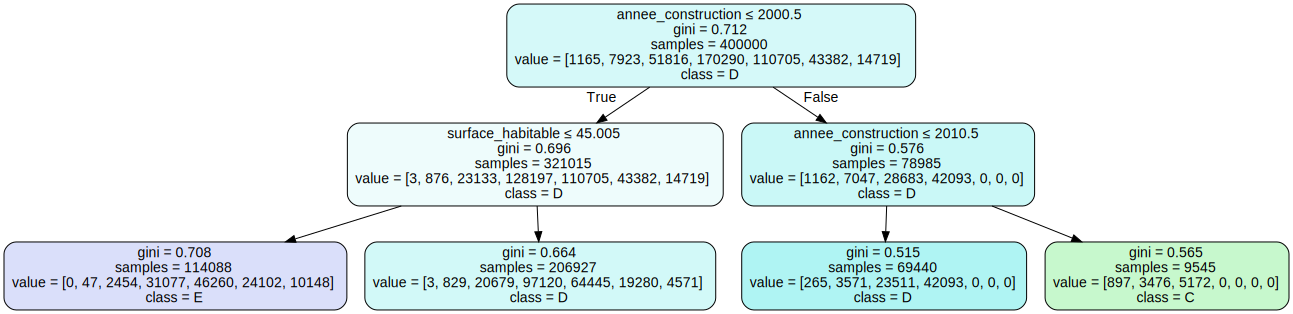

In [54]:
dot_data = sklearn.tree.export_graphviz(clf, out_file=None,   
                         feature_names=names,  
                         class_names=le.classes_,                 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [55]:
from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train)*100)

y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)


47.66125
47.331


47 % de bonnes prédictions ! Mais seules trois classes sont prédites ( C , D, E )

In [56]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_test)
sous_totaux = np.array([sum(y_test==0),sum(y_test==1),
               sum(y_test==2),sum(y_test==3),
               sum(y_test==4),sum(y_test==5),
               sum(y_test==6)])


for i in range(conf.shape[0]):
    conf[i] = conf[i]/sous_totaux[i]*100

conf


array([[ 0,  0, 76, 23,  0,  0,  0],
       [ 0,  0, 43, 55,  0,  0,  0],
       [ 0,  0,  9, 85,  4,  0,  0],
       [ 0,  0,  0, 81, 18,  0,  0],
       [ 0,  0,  0, 58, 41,  0,  0],
       [ 0,  0,  0, 44, 55,  0,  0],
       [ 0,  0,  0, 30, 69,  0,  0]])

#### arbre plus complexe (10 niveaux)

In [57]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth = 10)
clf = clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train)*100)

y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)

conf = confusion_matrix(y_test, y_pred_test)
sous_totaux = np.array([sum(y_test==0),sum(y_test==1),
               sum(y_test==2),sum(y_test==3),
               sum(y_test==4),sum(y_test==5),
               sum(y_test==6)])


for i in range(conf.shape[0]):
    conf[i] = conf[i]/sous_totaux[i]*100

conf



52.402249999999995
51.543000000000006


array([[52, 22, 13, 10,  0,  0,  0],
       [ 2, 21, 48, 27,  0,  0,  0],
       [ 0,  1, 36, 58,  3,  0,  0],
       [ 0,  0,  5, 74, 20,  0,  0],
       [ 0,  0,  0, 48, 48,  1,  0],
       [ 0,  0,  0, 31, 59,  6,  3],
       [ 0,  0,  0, 17, 59,  8, 15]])

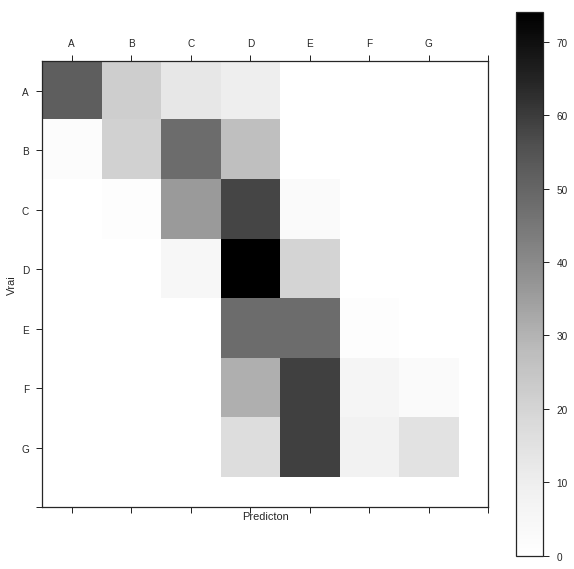

In [61]:
labels = ['A', 'B', 'C','D','E','F','G']



fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(conf)
fig.colorbar(cax)

ax.set_xlabel('Predicton')
ax.set_ylabel('Vrai')

yticks = [0,1,2,3,4,5,6,7]
xticks = [0,1,2,3,4,5,6,7]
ax.set_yticks(yticks)
ax.set_xticks(yticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()



C'est lieux (52%) et toutes les classes sont prédites !!
Regardons l'arbre de décision


In [58]:
dot_data = sklearn.tree.export_graphviz(clf, out_file=None,   
                         feature_names=names,  
                         class_names=le.classes_,                 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Black Box : Forêts aléatoires

#### On commence par un peu de *scaling* !

Les algos de ML se comportent mieux quand les différentes colonnes ont une échelle similaire (exemple : toutes les valeurs entre 0 et 1).

Pourquoi ? 

![Texte alternatif…](https://raw.githubusercontent.com/rst-analytics/atelier-ml/master/index.png)

Référence : Aurélien Guéron

In [0]:
from sklearn import preprocessing
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=150, max_depth=10)
clf_rf = clf_rf.fit(X_scaled_train, y_train)

y_pred_train = clf_rf.predict(X_scaled_train)
print(accuracy_score(y_train,y_pred_train)*100)

y_pred_test = clf_rf.predict(X_scaled_test)
print(accuracy_score(y_test,y_pred_test)*100)


50.78875000000001
50.041999999999994


Décevant et un peu de sur-apprentissage.

### Importances des variables
L'un des intérêts de l'algo _RandomForest_ est sa capacité à quantifier l'importance des variables dans la prédition.

In [64]:
feature_imp = pd.Series(clf_rf.feature_importances_, index= names).sort_values(ascending=False)
feature_imp.head(10)

annee_construction             0.517978
surface_habitable              0.233388
altitude                       0.091346
tv016_departement_id           0.047202
hsp_moyenne                    0.032134
tr001_modele_dpe_id_11         0.022079
nombre_niveau                  0.020021
tr001_modele_dpe_id_10         0.004888
tv026_classe_inertie_id_1.0    0.004663
tr001_modele_dpe_id_1          0.004607
dtype: float64

C'est sans surprise !



In [65]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred_test)
sous_totaux = np.array([sum(y_test==0),sum(y_test==1),
               sum(y_test==2),sum(y_test==3),
               sum(y_test==4),sum(y_test==5),
               sum(y_test==6)])


for i in range(conf.shape[0]):
    conf[i] = conf[i]/sous_totaux[i]*100

conf


array([[30, 17, 29, 22,  0,  0,  0],
       [ 0, 11, 39, 48,  0,  0,  0],
       [ 0,  0, 16, 81,  2,  0,  0],
       [ 0,  0,  0, 86, 12,  0,  0],
       [ 0,  0,  0, 62, 36,  0,  0],
       [ 0,  0,  0, 44, 48,  4,  2],
       [ 0,  0,  0, 26, 55,  5, 12]])

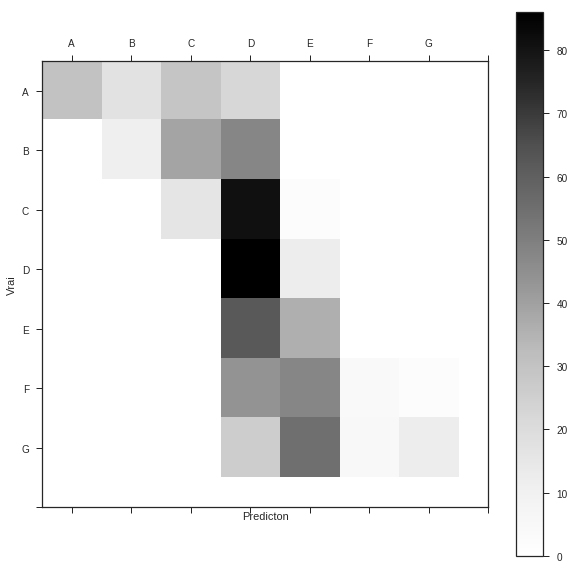

In [66]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(conf)
fig.colorbar(cax)

ax.set_xlabel('Predicton')
ax.set_ylabel('Vrai')

yticks = [0,1,2,3,4,5,6,7]
xticks = [0,1,2,3,4,5,6,7]
ax.set_yticks(yticks)
ax.set_xticks(yticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

### Prédiction à une classe près ?

In [67]:
conf = confusion_matrix(y_test, y_pred_test)

good = 0
dim = conf.shape[0]


for i in range(dim):
    good = good + conf[i,i]
    if (i > 0) :
        good = good + conf[i,i-1]
    if (i < dim-1) :
        good = good + conf[i,i+1]
    
good/sum(sous_totaux)




0.9067

90 % de prédiction à une classe près.

# Elements de conclusions

On pourrait aller plus loin (autres algorithmes, *tuning* de paramètres, meilleur filtrage, ré-échantillonnage pour avoir des classes plus homogènes ...) mais ce n'est pas le but de l'exercice. Nous arrivons ici facilement à prédire 50 % des DPE et 90 % à une classe près. C'est à la fois satisfaisant (**90% à une classe près !! **) au regard des effets de seuils et des imprécisions du système et un peu décevant car on aurait voulu faire mieux. 

N'oublions pas - qu'au regard de la distribution des DPE - qu'un algorithme simple arenvoyant systématiquement en sortie la classe  D (quelle que soit la donnée en entrée) aurait 35% de réussite et sans doute 80 % à une classe près.

**Pour aller plus loin, il nous faudrait sans doute plus d'information comme le type d'énergie, le type de travaux ayant pu être réalisés, ... d'autres données etc.**

Enfin, un travail avec des experts du sujet (DHUP, CSTB, Ademe ...) aurait permis de comprendre ce que nous avons fait du point de vue du **métier**. Parce qu'au-delà de l'exemple didactique, ça n'a peut-être pas beaucoup de sens.





**_Les données DPE ont une grande valeur : Un grand coup de chapeau à l'Ademe pour leur mise en open data !_**


## Encore plus loin ?

Pour aller encore plus loin, et croiser les données DPE (sorte d'éléments théoriques de consommation) avec les consommations effectives pour tenter de mettre en évidence des effets rebonds, venez découvrir les travaux du CSTB, du Cerema et de l'IGN lors du dernier **RST Analytics**. (Atelier de fin de journée dans l'amphi de la Tour Sequoia)

## Le notebook de l'année dernière ? (classifcation d'image) 
https://github.com/rst-analytics/atelier-ml/blob/master/cifar10.ipynb